<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/W9_MNIST_27_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

So nay la: 5


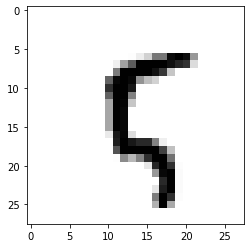

In [ ]:
from numpy import show_config
import matplotlib.pyplot as plt
hinh = train_images[100]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print('So nay la:',train_labels[100])



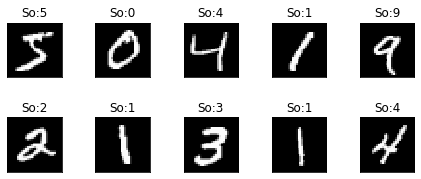

In [ ]:
for i in range (10):
   plt.subplot(3,5,i+1)
   plt.tight_layout()
   plt.imshow(train_images[i],cmap='gray',interpolation='none')
   plt.title('So:{}'.format(train_labels[i]))
   plt.xticks([])
   plt.yticks([])

In [ ]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential

model=Sequential()
model.add (Dense(512,activation='relu',input_shape=(28*28,),name='Lop1'))
model.add (Dense(10,activation='softmax',name='Lopra'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 512)               401920    
                                                                 
 Lopra (Dense)               (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

In [ ]:
test_images=test_images.reshape((10000,28*28)) 
test_images=test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical # one hot encoding
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Độ chính xác trên tập kiểm tra :',test_acc)
print('Hàm mất mát trên tập kiểm tra :',test_loss)



Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2616 - accuracy: 0.9250
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1067 - accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0707 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0511 - accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0388 - accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0290 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0219 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0131 - accuracy: 0.9965
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0664 - accuracy: 0.9815

1/1 [==============================] - 0s 118ms/step


array([8])

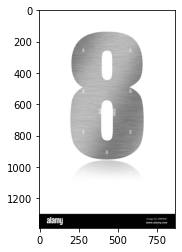

In [ ]:
from keras.utils import load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.image_utils import img_to_array
url='8.jpg'
img=load_img(url)
plt.imshow(img)
img=load_img(url,target_size=(28,28))
img=img_to_array(img)
img=img[:,:,0]
img=img.reshape(1,28*28)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

